# Table of Content

- [Table of Content](#table-of-content)
- [General](#general)
  - [Introduction](#introduction)
  - [Objective](#objective)
  - [Acknowledgements](#acknowledgements)
- [Cohen's kappa](#cohens-kappa)
  - [Cohen's kappa between each raters](#cohens-kappa-between-each-of-the-raters)
  - [Cohen's kappa per assessment tool](#cohens-kappa-per-assessment-tool)
  - [Cohen's kappa overall](#cohens-kappa-overall)
  - [Cohen's kappa per domain within tools](#cohens-kappa-per-domain-within-tool)
  - [Cohen's kappa heatmaps](#cohens-kappa-agreement-heatmap)
- [Risk of Bias tool 1](#risk-of-bias-tool-1)
- [ROBINS-I](#robins-i)
- [ROBINS-E](#robins-e)

# General
[Back to Table of Content](#table-of-content)
# Cold Water Exposure and Mental Health in Adults: A Systematic Review and Meta-Analysis

## Introduction
[Back to Table of Content](#table-of-content)

Mental disorders such as depression and anxiety are among the leading causes of disability worldwide, causing substantial impairments in quality of life, social functioning, and physical health. Although pharmacological and psychotherapeutic treatments are effective, they face important limitations, adverse effects, limited accessibility, and long waiting times remain persistent barriers. Consequently, there is growing interest in low-threshold, safe, and biologically plausible interventions that can complement existing treatments and broaden the therapeutic landscape.

Cold-water exposure (CWE), including practices such as ice bathing, winter swimming, and cold showers, has gained increasing public and scientific attention as a potential approach to support mental health and well-being. Historically rooted in hydrotherapy, CWE is now being examined for its psychophysiological effects on stress regulation, mood, and resilience. Preliminary evidence suggests that repeated exposure to cold water may reduce depressive and anxiety symptoms, lower perceived stress, and enhance general well-being.

Mechanistically, CWE is conceptualized as an acute stressor that triggers adaptive responses in autonomic and neuroendocrine systems. With repeated exposure, these systems may recalibrate toward improved stress tolerance and emotional regulation, consistent with the principle of cross-stressor adaptation. Additional hypotheses include transient neurotransmitter changes (e.g., dopamine, serotonin) and behavioral mechanisms such as increased self-efficacy and mastery, which parallel elements of behavioral activation in depression.

However, the available evidence remains fragmented. Studies differ widely in design, population, exposure protocols, and outcome measures, and few include clinical populations or long-term follow-up. This systematic review and meta-analysis therefore synthesizes the full range of available studies to clarify the effects of CWE on mental health outcomes in adults, integrating psychological, physiological, and safety data to provide a comprehensive and clinically meaningful synthesis.

## Objective
[Back to Table of Content](#table-of-content)

1. **Primary Objective:**  
   To evaluate the effects of MBTs on immune function in children and adolescents, with a focus on:  
   - Reducing proinflammatory markers (e.g., TNF-α, IL-6, CXCL8, CRP, SAA)  
   - Increasing anti-inflammatory markers (e.g., IL-10, TGF-β)  
   - Modulating dual-function markers (e.g., VEGF, immune cell subsets, immunoglobulins, ferritin, fibrinogen, ESR)  

2. **Secondary Objectives:**  
   - Assess whether effects differ between pediatric-only vs. mixed-age populations.  
   - Assess whether effects differ between healthy participants vs. those with immune impairments.  

3. **Exploratory Objectives:**  
   - Assess safety and tolerability of MBTs in children and adolescents (adverse events, dropout rates).  
   - Examine longitudinal effects on immune outcomes (≥6 months post-intervention).  
   - Evaluate psychosocial benefits of MBTs on quality of life and psychological well-being.  

## Hypotheses
#### Primary Hypotheses
- **H1a:** MBTs reduce proinflammatory markers in children and adolescents.  
- **H1b:** MBTs increase anti-inflammatory markers in children and adolescents.  
- **H1c:** MBTs beneficially modulate dual-function immunological markers.  

#### Secondary Hypotheses
- **H2a:** MBTs show stronger effects in pediatric-only samples compared to mixed-age studies.  
- **H2b:** MBTs are more effective in children and adolescents with immune impairments than in healthy populations.  

#### Exploratory Hypotheses
- **H3a:** MBTs are safe and well tolerated, with <5% adverse event rates and <10% dropout.  
- **H3b:** Immunological benefits of MBTs persist or increase at ≥6-month follow-up.  
- **H3c:** MBTs improve psychosocial outcomes such as quality of life and well-being.  

## Acknowledgements
[Back to Table of Content](#table-of-content)

This review is conducted within the framework of the **Charité Competence Center for Traditional and Integrative Medicine (CCCTIM)**. We acknowledge the contributions of all co-authors, student assistants, and reviewers involved in screening and extraction. Statistical analysis and review methodology are overseen by **Dr. Steven Schepanski**.  

# Packages
[Back to Table of Content](#table-of-content)

In [1]:
# Define required packages
packages <- c("readxl", "dplyr", "tidyr", "stringr", "ggplot2", "patchwork", "ggtext", "scales", "irr")

# Function to install and load packages silently
install_and_load <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) install.packages(pkg, quiet = TRUE)
  suppressPackageStartupMessages(
    library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE)
  )
}

# Apply function to all packages
invisible(lapply(packages, install_and_load))

Warning message:
“package ‘readxl’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”
Warning message:
“package ‘scales’ was built under R version 4.3.3”
Warning message:
“package ‘irr’ was built under R version 4.3.3”
Warning message:
“package ‘lpSolve’ was built under R version 4.3.3”


In [2]:
# Define the working directory
path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/CWEMetaAnalysis/"

# Define subfolder for graphs
output_path <- file.path(path, "graphs")
# Create the folder if it does not yet exist
if (!dir.exists(output_path)) dir.create(output_path)

# Cohen's kappa

## Cohen's kappa between each of the raters

In [3]:
# Load
rob <- read_excel(file.path(path, "data/InterraterReliability.xlsx"))

In [4]:
# Clean column names
rob <- rob %>% janitor::clean_names()

In [5]:
# Safe unweighted kappa: returns NA if only one category present
safe_kappa_unweighted <- function(x, y) {
  if (dplyr::n_distinct(x) < 2 && dplyr::n_distinct(y) < 2) return(NA_real_)
  irr::kappa2(cbind(x, y))$value
}


In [6]:
# Safe weighted kappa (for ordinal scales)
safe_kappa_weighted <- function(x, y) {
  if (dplyr::n_distinct(x) < 2 && dplyr::n_distinct(y) < 2) return(NA_real_)
  irr::kappa2(cbind(x, y), weight = "squared")$value
}

In [7]:
# Percent agreement
percent_agreement <- function(x, y) mean(x == y)

## Cohen's kappa per assessment tool

In [8]:
# Cohen’s kappa per tool
kappa_per_tool <- rob |>
  group_split(tool) |>
  lapply(function(df) {
    this_tool <- unique(df$tool)

    # unweighted always
    ka_u <- safe_kappa_unweighted(df$rater1_judgement, df$rater2_judgment)

    # weighted only for ordinal tools
    ka_w <- if (this_tool %in% c("RoB1", "ROBINS-I")) {
      safe_kappa_weighted(df$rater1_judgement, df$rater2_judgment)
    } else {
      NA_real_
    }

    tibble(
      tool = this_tool,
      n = nrow(df),
      agreement_pct = percent_agreement(df$rater1_judgement, df$rater2_judgment),
      kappa_unweighted = ka_u,
      kappa_weighted   = ka_w
    )
  }) |>
  bind_rows()

kappa_per_tool

tool,n,agreement_pct,kappa_unweighted,kappa_weighted
<chr>,<int>,<dbl>,<dbl>,<dbl>
ROBINS-E,2,1.0000000,NA,NA
ROBINS-I,42,0.9523810,0.9332273,0.9747748
RoB1,28,0.9642857,0.9423868,0.9766667


Interrater reliability between the two independent reviewers was high across all assessment tools. For randomized controlled trials assessed using the Cochrane Risk of Bias (RoB 1) tool, overall agreement was 96.4%, corresponding to a Cohen’s κ = 0.94 (weighted κ = 0.98), indicating almost perfect agreement according to Landis and Koch’s interpretation. For non-randomized studies evaluated with the ROBINS-I tool, agreement was comparably high (95.2%, κ = 0.93, weighted κ = 0.97). The few exploratory evaluations conducted using ROBINS-E achieved complete agreement between raters (100%), though the small number of cases (n = 2) precludes meaningful statistical interpretation.

Overall, these values demonstrate excellent consistency between raters and confirm the reliability of the bias assessments across study designs.

## Cohen's kappa overall

In [9]:
# Cohen’s kappa over ALL ratings
overall <- tibble(
  scope = "overall_all_tools",
  n = nrow(rob),
  agreement_pct = percent_agreement(rob$rater1_judgement, rob$rater2_judgment),
  kappa_unweighted = safe_kappa_unweighted(rob$rater1_judgement, rob$rater2_judgment),
  kappa_weighted   = safe_kappa_weighted(rob$rater1_judgement, rob$rater2_judgment)  # interpret with care
)

overall

scope,n,agreement_pct,kappa_unweighted,kappa_weighted
<chr>,<int>,<dbl>,<dbl>,<dbl>
overall_all_tools,72,0.9583333,0.9493671,0.9913475


When considering all risk-of-bias tools jointly, overall interrater agreement across the 72 individual ratings was 95.8%, corresponding to a Cohen’s κ = 0.95 and a weighted κ = 0.99. According to conventional benchmarks (Landis & Koch, 1977, PMID: 843571), this represents almost perfect reliability. Thus, the risk-of-bias assessments were highly consistent across raters, suggesting that the applied criteria and calibration process were well-standardized and that subjective discrepancies were minimal.

## Cohen's kappa per domain (within tool)

In [10]:
# Cohen’s kappa per domain (within tool)
kappa_per_tool_domain <- rob |>
  group_by(tool, domain) |>
  group_split() |>
  lapply(function(df) {
    tibble(
      tool = df$tool[1],
      domain = df$domain[1],
      n = nrow(df),
      agreement_pct = percent_agreement(df$rater1_judgement, df$rater2_judgment),
      kappa_unweighted = safe_kappa_unweighted(df$rater1_judgement, df$rater2_judgment),
      kappa_weighted = if (df$tool[1] %in% c("RoB1", "ROBINS-I")) {
        safe_kappa_weighted(df$rater1_judgement, df$rater2_judgment)
      } else {
        NA_real_
      }
    )
  }) |>
  bind_rows() |>
  arrange(tool, desc(agreement_pct))

kappa_per_tool_domain

tool,domain,n,agreement_pct,kappa_unweighted,kappa_weighted
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
ROBINS-E,Overall risk,2,1.0000000,NA,NA
ROBINS-I,Bias due to deviations from intended interventions,6,1.0000000,1.0000000,1.0000000
ROBINS-I,Bias due to missing data,6,1.0000000,1.0000000,1.0000000
ROBINS-I,Bias in classification of interventions,6,1.0000000,1.0000000,1.0000000
ROBINS-I,Bias in selection of participants into the study,6,1.0000000,1.0000000,1.0000000
ROBINS-I,Bias in selection of the reported result,6,1.0000000,1.0000000,1.0000000
ROBINS-I,Bias due to confounding,6,0.8333333,0.6666667,0.8888889
ROBINS-I,Bias in measurement of outcomes,6,0.8333333,0.0000000,0.0000000
RoB1,Attrition Bias: Incomplete Outcome Data,4,1.0000000,1.0000000,1.0000000


Across individual domains, interrater agreement was uniformly high for both randomized and non-randomized studies. For randomized controlled trials assessed with the Cochrane RoB 1 tool, full agreement (100%) was achieved across nearly all domains, including random sequence generation, allocation concealment, blinding of participants/personnel, blinding of outcome assessment, incomplete outcome data, and selective reporting (κ = 1.00 where applicable). A slightly lower agreement (75%; κ = 0.50) was observed for the domain “other sources of bias”, indicating minor interpretive variability when rating less well-defined or study-specific sources of potential bias.

For non-randomized studies evaluated using ROBINS-I, interrater agreement was likewise excellent across most domains, with perfect agreement (100%; κ = 1.00) for confounding-independent domains such as selection of participants, classification of interventions, deviations from intended interventions, missing data, and selection of the reported result. Slightly reduced agreement emerged for bias due to confounding (83%; κ = 0.67, weighted = 0.89) and for bias in measurement of outcomes (83%; κ ≈ 0.00), reflecting greater subjectivity in judging residual confounding and outcome measurement procedures typical for observational designs.

The two exploratory ROBINS-E assessments showed complete concordance across raters, though their limited number precludes statistical interpretation.

Taken together, these findings confirm consistently high reliability across domains, with minor divergence confined to the more interpretatively demanding areas of confounding and measurement bias in non-randomized studies, and other bias in RCTs.

## Cohen's kappa agreement heatmap

In [11]:
# Increase the width and height of the plot
options(repr.plot.width = 8, repr.plot.height = 7)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

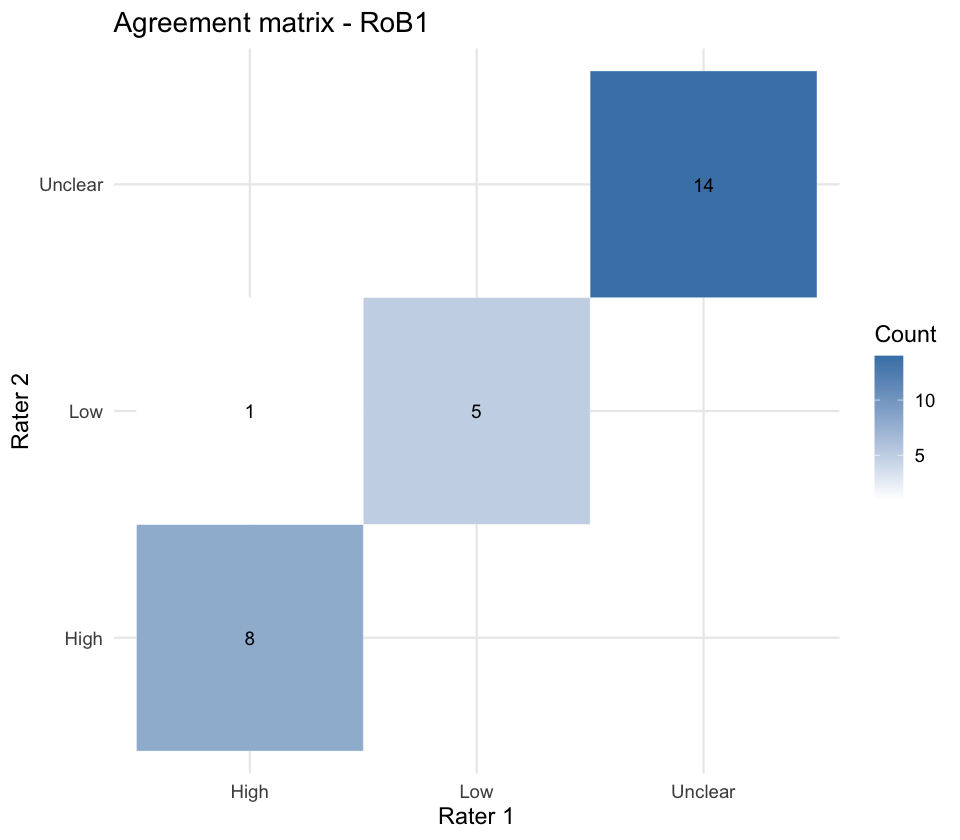

In [12]:
# Agreement heatmap / confusion matrix
# RoB1 only, counts
confusion_rob1 <- rob |>
  filter(tool == "RoB1") |>
  count(rater1_judgement, rater2_judgment)

p_confusion_rob1 <- ggplot(confusion_rob1,
  aes(x = rater1_judgement,
      y = rater2_judgment,
      fill = n)) +
  geom_tile(color = "white") +
  geom_text(aes(label = n), size = 4) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(
    title = "Agreement matrix - RoB1",  # <- plain hyphen
    x = "Rater 1",
    y = "Rater 2",
    fill = "Count"
  ) +
  theme_minimal(base_size = 14)

p_confusion_rob1

In [13]:
# Save plot as PDF
file_out <- file.path(output_path, "AgreementMatrix_RoB1.pdf")

ggsave(filename = file_out,
       plot = p_confusion_rob1,
       device = pdf,  # better font rendering on macOS
       width = 8,
       height = 7,
       dpi = 400)

The agreement matrix for the Cochrane Risk of Bias (RoB 1) tool illustrates a strong diagonal pattern, confirming high concordance between raters across judgments. Most assessments clustered along the agreement diagonal, with 14 cases rated as “Unclear” by both reviewers, eight as “High risk”, and five as “Low risk”. Only minor discrepancies occurred, primarily between Low and High risk categories (n = 1) or between Low and Unclear ratings, reflecting occasional differences in how ambiguous reporting or methodological detail was interpreted.

Overall, the distribution supports the quantitative findings of high interrater reliability (κ = 0.94), with disagreement limited to isolated instances of uncertainty rather than systematic bias in reviewer judgments.

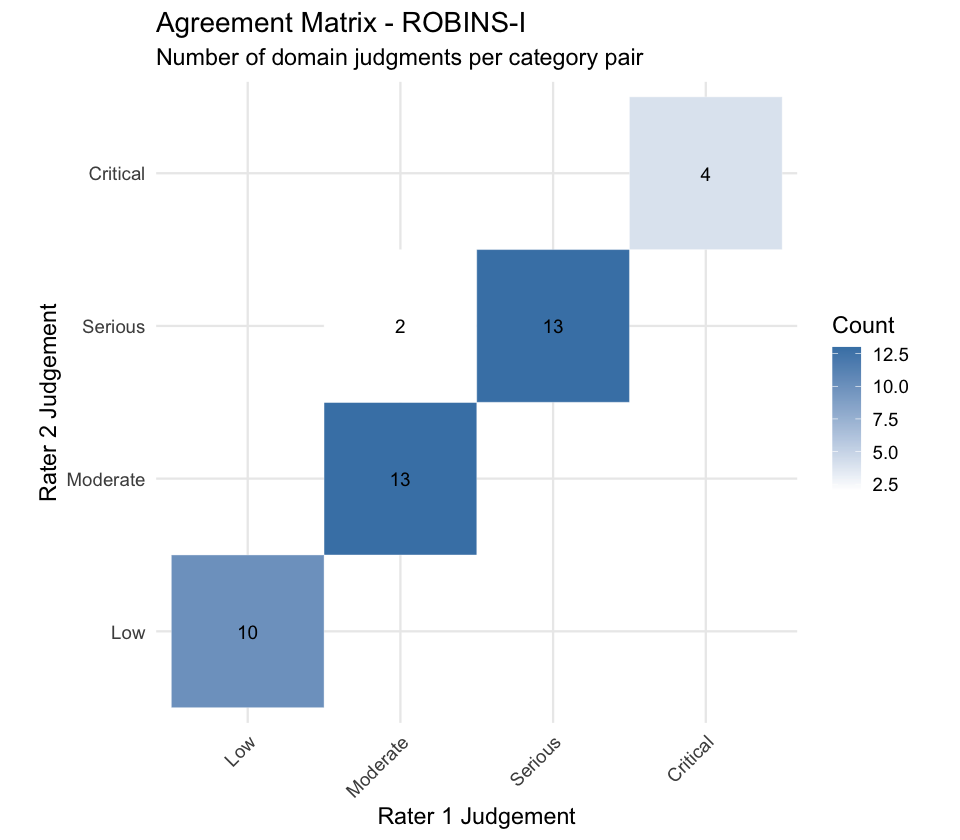

In [14]:
# Agreement heatmap / confusion matrix
# Define the ordinal order for ROBINS-I levels
robins_levels <- c("Low", "Moderate", "Serious", "Critical")

# Create the confusion matrix for ROBINS-I
confusion_robins <- rob |>
  filter(tool == "ROBINS-I") |>
  mutate(
    rater1_judgement = factor(rater1_judgement, levels = robins_levels),
    rater2_judgment  = factor(rater2_judgment,  levels = robins_levels)
  ) |>
  count(rater1_judgement, rater2_judgment)

# Plot heatmap of counts
p_confusion_robins <- ggplot(confusion_robins,
       aes(x = rater1_judgement,
           y = rater2_judgment,
           fill = n)) +
  geom_tile(color = "white") +
  geom_text(aes(label = n), size = 4) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(
    title = "Agreement Matrix - ROBINS-I",  # <- plain hyphen
    subtitle = "Number of domain judgments per category pair",
    x = "Rater 1 Judgement",
    y = "Rater 2 Judgement",
    fill = "Count"
  ) +
  coord_equal() +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

p_confusion_robins

The ROBINS-I agreement matrix shows a strong concentration of ratings along the diagonal, indicating substantial concordance between raters.
Most domain judgments coincided in the Low (n = 10), Moderate (n = 13), and Serious (n = 13) categories. Only two off-diagonal cells reflect minor disagreements, where one reviewer rated Serious and the other Moderate. Four ratings were jointly classified as Critical, again reflecting full agreement.

Overall, the pattern confirms the quantitative reliability indices (κ = 0.93; weighted κ = 0.97): disagreements were infrequent, limited in magnitude (adjacent categories), and did not affect the ordinal structure of judgments. This consistency supports the robustness of the non-randomized study quality assessment.

For the exploratory ROBINS-E evaluations (n = 2), both raters assigned identical judgments, resulting in 100 % agreement across all domains.
Given the extremely small number of assessments, no separate agreement matrix was plotted, as visualization would not provide additional interpretive value. Nonetheless, the complete concordance further supports the consistency of reviewer calibration across all applied tools.

In [15]:
# Save plot as PDF
file_out <- file.path(output_path, "AgreementMatrix_ROBINS-I.pdf")

ggsave(
  filename = file_out,
  plot = p_confusion_robins,
  device = "pdf",   # safe, portable
  width = 8,
  height = 7,
  dpi = 400
)

# Risk of Bias tool 1

In [16]:
file <- file.path(path, "data", "IntegratedRiskOfBias.xlsx")

In [17]:
# Reading sheet
rob1_raw <- readxl::read_excel(file, sheet = 1)

In [18]:
## quick check
glimpse(rob1_raw)

Rows: 4
Columns: 9
$ studyid                                                   <dbl> 1, 2, 4, 6
$ authors                                                   <chr> "Blades et a…
$ `Selection Bias: Random Sequence Generation`              <chr> "Unclear", "…
$ `Selection Bias: Allocation Concealment`                  <chr> "Unclear", "…
$ `Performance Bias: Blinding (Participants and Personnel)` <chr> "High", "Hig…
$ `Detection Bias: Blinding (Outcome Assessment)`           <chr> "Unclear", "…
$ `Attrition Bias (Incomplete Outcome Data)`                <chr> "High", "Hig…
$ `Reporting Bias: Selective Reporting`                     <chr> "Unclear", "…
$ `Other Bias: Other Sources of Bias`                       <chr> "High", "Low…


In [19]:
# Helper to harmonise levels
recode_rob1 <- function(x) {
  dplyr::case_when(
    x %in% c("Low", "low") ~ "Low",
    x %in% c("Unclear", "unclear") ~ "Unclear",
    x %in% c("High", "high") ~ "High",
    TRUE ~ "No information"
  )
}

In [20]:
# Bring to long format and map to 5 domains
rob1_long <- rob1_raw %>%
  transmute(
    studyid,
    authors,
    # map RoB-1 columns to the Cochrane-like labels
    `Bias arising from the randomization process` =
      recode_rob1(`Selection Bias: Random Sequence Generation`),
    `Bias due to deviations from intended interventions` =
      recode_rob1(`Performance Bias: Blinding (Participants and Personnel)`),
    `Bias due to missing outcome data` =
      recode_rob1(`Attrition Bias (Incomplete Outcome Data)`),
    `Bias in measurement of the outcome` =
      recode_rob1(`Detection Bias: Blinding (Outcome Assessment)`),
    `Bias in selection of the reported result` =
      recode_rob1(`Reporting Bias: Selective Reporting`)
  ) %>%
  tidyr::pivot_longer(
    cols = -c(studyid, authors),
    names_to = "domain",
    values_to = "judgement"
  )

In [21]:
# Domain-level summary (counts -> %)
rob1_summary <- rob1_long %>%
  count(domain, judgement, name = "n_studies") %>%
  group_by(domain) %>%
  mutate(pct = n_studies / sum(n_studies) * 100) %>%
  ungroup()

In [22]:
# Overall risk of bias (worst per study -> tabulate)
# order from best -> worst
judgement_order <- c("Low", "Unclear", "High", "No information")

rob1_overall <- rob1_long %>%
  # turn judgement into a rank we can take max() of
  mutate(
    j_rank = match(judgement, judgement_order)  # Low=1, Some=2, High=3, No info=4
  ) %>%
  group_by(studyid, authors) %>%
  summarise(
    worst_rank = max(j_rank, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    judgement = judgement_order[worst_rank]
  ) %>%
  count(domain = "Overall risk of bias", judgement, name = "n_studies") %>%
  group_by(domain) %>%
  mutate(pct = n_studies / sum(n_studies) * 100) %>%
  ungroup()

In [23]:
# Bind overall + domain-wise 
rob1_summary_full <- dplyr::bind_rows(rob1_overall, rob1_summary) %>%
  dplyr::mutate(
    domain = factor(
      domain,
      levels = c(
        "Overall risk of bias",
        "Bias arising from the randomization process",
        "Bias due to deviations from intended interventions",
        "Bias due to missing outcome data",
        "Bias in measurement of the outcome",
        "Bias in selection of the reported result"
      )
    ),
    judgement = factor(
      judgement,
      levels = c("Low", "Unclear", "High", "No information")
    )
  )

In [24]:
# Colours
cols <- c(
  "Low" = "#FEE8B6",          # light yellow
  "Unclear" = "#F6A54C",      # orange
  "High" = "#D3562C",         # red
  "No information" = "#D9D9D9" # grey
)


In [25]:
# Increase the width and height of the plot
options(repr.plot.width = 20, repr.plot.height = 7)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

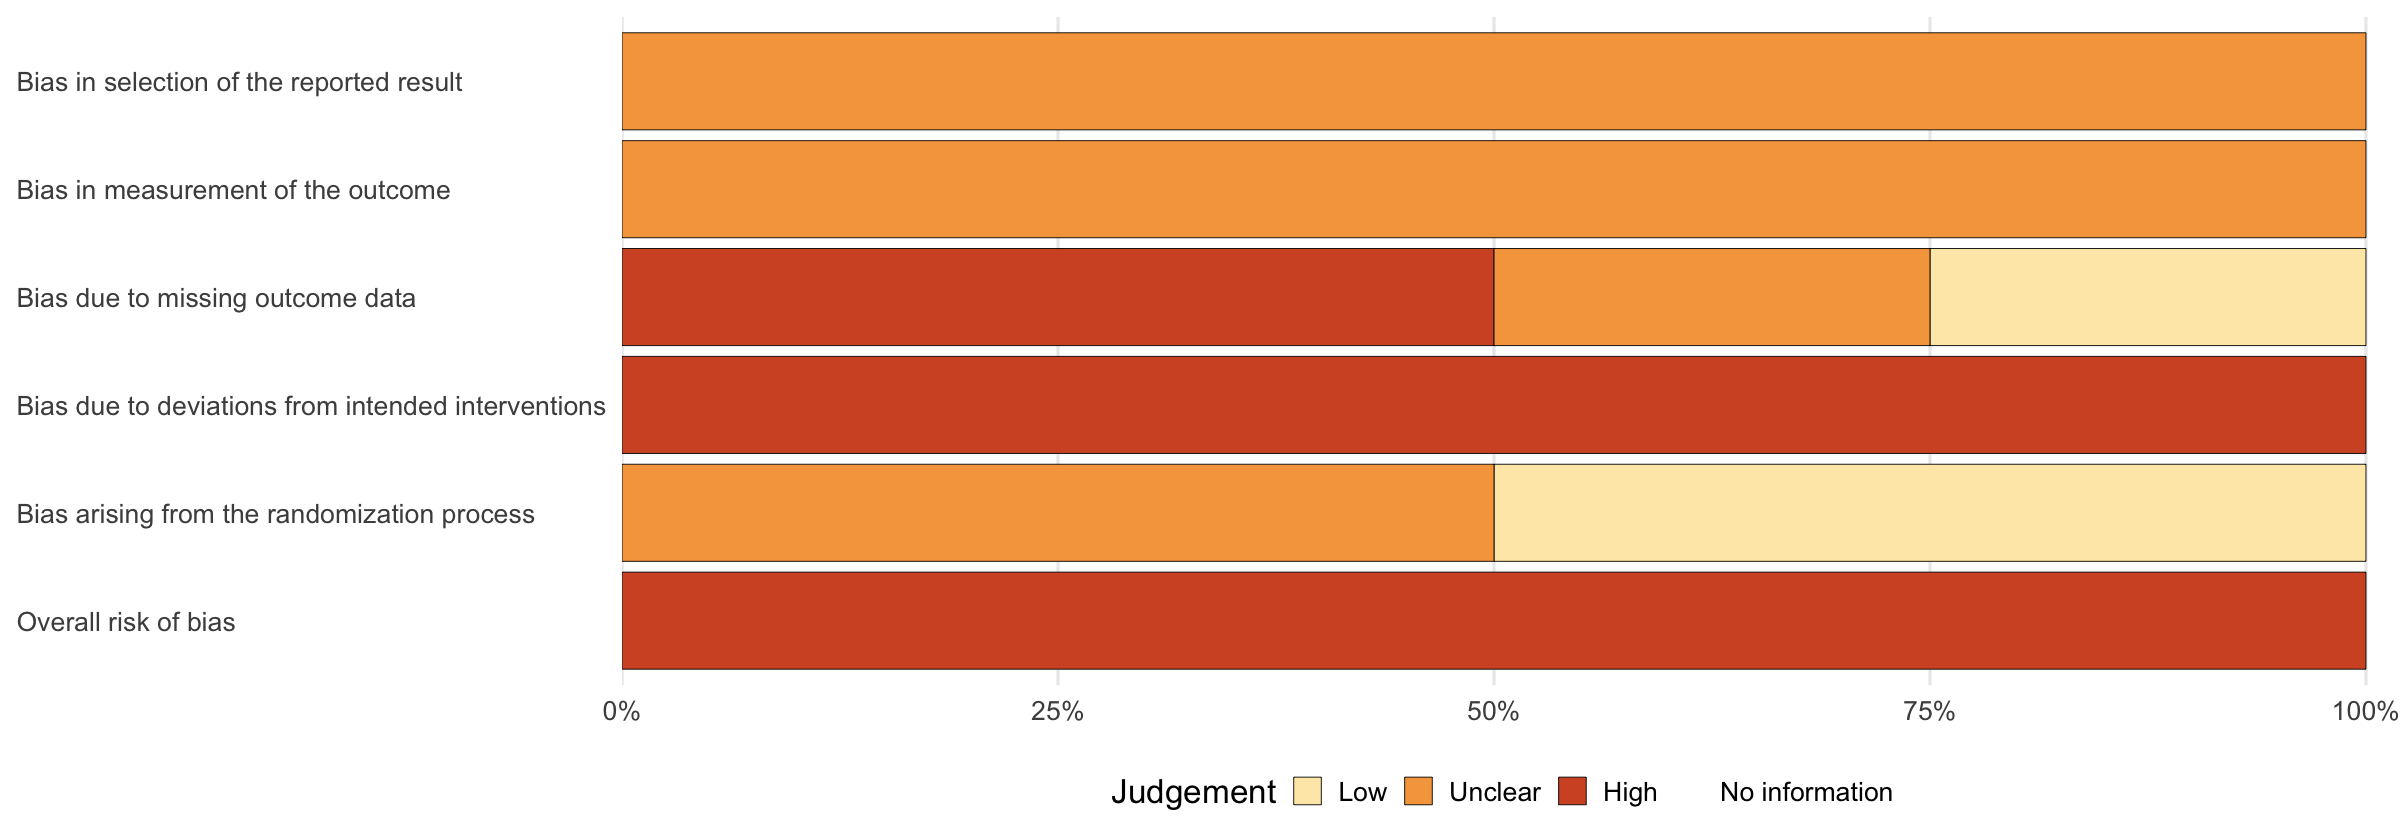

In [26]:
# Plot
p_rob1_summary <- ggplot(
  rob1_summary_full,
  aes(x = pct, y = domain, fill = judgement)
) +
  geom_col(color = "black", linewidth = 0.25) +
  scale_fill_manual(values = cols, drop = FALSE) +
  scale_x_continuous(labels = function(x) paste0(x, "%"), expand = expansion(mult = c(0, 0.01))) +
  labs(x = NULL, y = NULL, fill = "Judgement") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    legend.direction = "horizontal",
    legend.box = "horizontal",
    axis.text.y = element_text(hjust = 0)
  )

p_rob1_summary

Risk-of-bias assessment of randomized controlled trials revealed heterogeneous methodological quality across domains. The overall risk of bias was rated as high in the majority of studies, primarily reflecting deficiencies in reporting and intervention adherence. Specifically, bias due to deviations from intended interventions and bias due to missing outcome data were most frequently judged as high risk, often due to incomplete blinding procedures, dropouts without imputation, or unclear per-protocol analyses. Bias arising from the randomization process was more evenly distributed across low, unclear, and high categories, suggesting variable transparency in sequence generation and allocation concealment. In contrast, bias in measurement of the outcome and bias in selection of the reported result were predominantly rated as unclear, reflecting insufficient methodological detail in reporting rather than overt flaws.

Overall, the RoB 1 evaluation indicates that most randomized trials exhibited at least some methodological limitations, with performance and attrition biases representing the most consistent threats to internal validity.

In [27]:
# Save plot as PDF
file_out <- file.path(output_path, "RiskOfBiasSummary_RoB1.pdf")

ggsave(
  filename = file_out,
  plot = p_rob1_summary,
  device = "pdf",
  width = 20,
  height = 7,
  dpi = 400
)

# ROBINS-I

In [28]:
# Reading sheet
robins_raw <- readxl::read_excel(file, sheet = 2)

In [29]:
## quick check
glimpse(robins_raw)

Rows: 6
Columns: 9
$ studyid                                              <dbl> 7, 9, 14, 15, 16,…
$ authors                                              <chr> "Faid et al. 2022…
$ `Bias due to confounding`                            <chr> "Critical", "Seri…
$ `Bias in selection of participants into the study`   <chr> "Low", "Low", "Se…
$ `Bias in classification of interventions`            <chr> "Low", "Low", "Lo…
$ `Bias due to deviations from intended interventions` <chr> "Serious", "Moder…
$ `Bias due to missing data`                           <chr> "Serious", "Serio…
$ `Bias in measurement of outcomes`                    <chr> "Serious", "Serio…
$ `Bias in selection of the reported result`           <chr> "Low", "Low", "Se…


In [30]:
# Helper to harmonise levels (ROBINS-I)
recode_robins <- function(x) {
  dplyr::case_when(
    x %in% c("Low", "low") ~ "Low",
    x %in% c("Moderate", "moderate") ~ "Moderate",
    x %in% c("Serious", "serious") ~ "Serious",
    x %in% c("Critical", "critical") ~ "Critical",
    TRUE ~ "No information"
  )
}

In [31]:
# Long format
robins_long <- robins_raw %>%
  transmute(
    studyid,
    authors,
    `Bias due to confounding` =
      recode_robins(`Bias due to confounding`),
    `Bias in selection of participants into the study` =
      recode_robins(`Bias in selection of participants into the study`),
    `Bias in classification of interventions` =
      recode_robins(`Bias in classification of interventions`),
    `Bias due to deviations from intended interventions` =
      recode_robins(`Bias due to deviations from intended interventions`),
    `Bias due to missing data` =
      recode_robins(`Bias due to missing data`),
    `Bias in measurement of outcomes` =
      recode_robins(`Bias in measurement of outcomes`),
    `Bias in selection of the reported result` =
      recode_robins(`Bias in selection of the reported result`)
  ) %>%
  tidyr::pivot_longer(
    cols = -c(studyid, authors),
    names_to = "domain",
    values_to = "judgement"
  )

In [32]:
# Domain-level summary
robins_summary <- robins_long %>%
  count(domain, judgement, name = "n_studies") %>%
  group_by(domain) %>%
  mutate(pct = n_studies / sum(n_studies) * 100) %>%
  ungroup()

In [33]:
# Overall risk of bias (worst per study)
robins_order <- c("Low", "Moderate", "Serious", "Critical", "No information")

robins_overall <- robins_long %>%
  mutate(
    j_rank = match(judgement, robins_order)
  ) %>%
  group_by(studyid, authors) %>%
  summarise(
    worst_rank = max(j_rank, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    judgement = robins_order[worst_rank]
  ) %>%
  count(domain = "Overall risk of bias", judgement, name = "n_studies") %>%
  group_by(domain) %>%
  mutate(pct = n_studies / sum(n_studies) * 100) %>%
  ungroup()

In [34]:
# Bind overall + domain-wise
robins_summary_full <- bind_rows(robins_overall, robins_summary) %>%
  mutate(
    domain = factor(
      domain,
      levels = c(
        "Overall risk of bias",
        "Bias due to confounding",
        "Bias in selection of participants into the study",
        "Bias in classification of interventions",
        "Bias due to deviations from intended interventions",
        "Bias due to missing data",
        "Bias in measurement of outcomes",
        "Bias in selection of the reported result"
      )
    ),
    judgement = factor(
      judgement,
      levels = robins_order
    )
  )

In [35]:
# Colours (ROBINS-I style but in your warm palette)
cols_robins <- c(
  "Low" = "#FEE8B6",          # same low as RoB1
  "Moderate" = "#F6C86C",     # a bit darker/oranger
  "Serious" = "#F6A54C",      # like your "Some concerns"
  "Critical" = "#D3562C",     # strong red
  "No information" = "#D9D9D9"
)

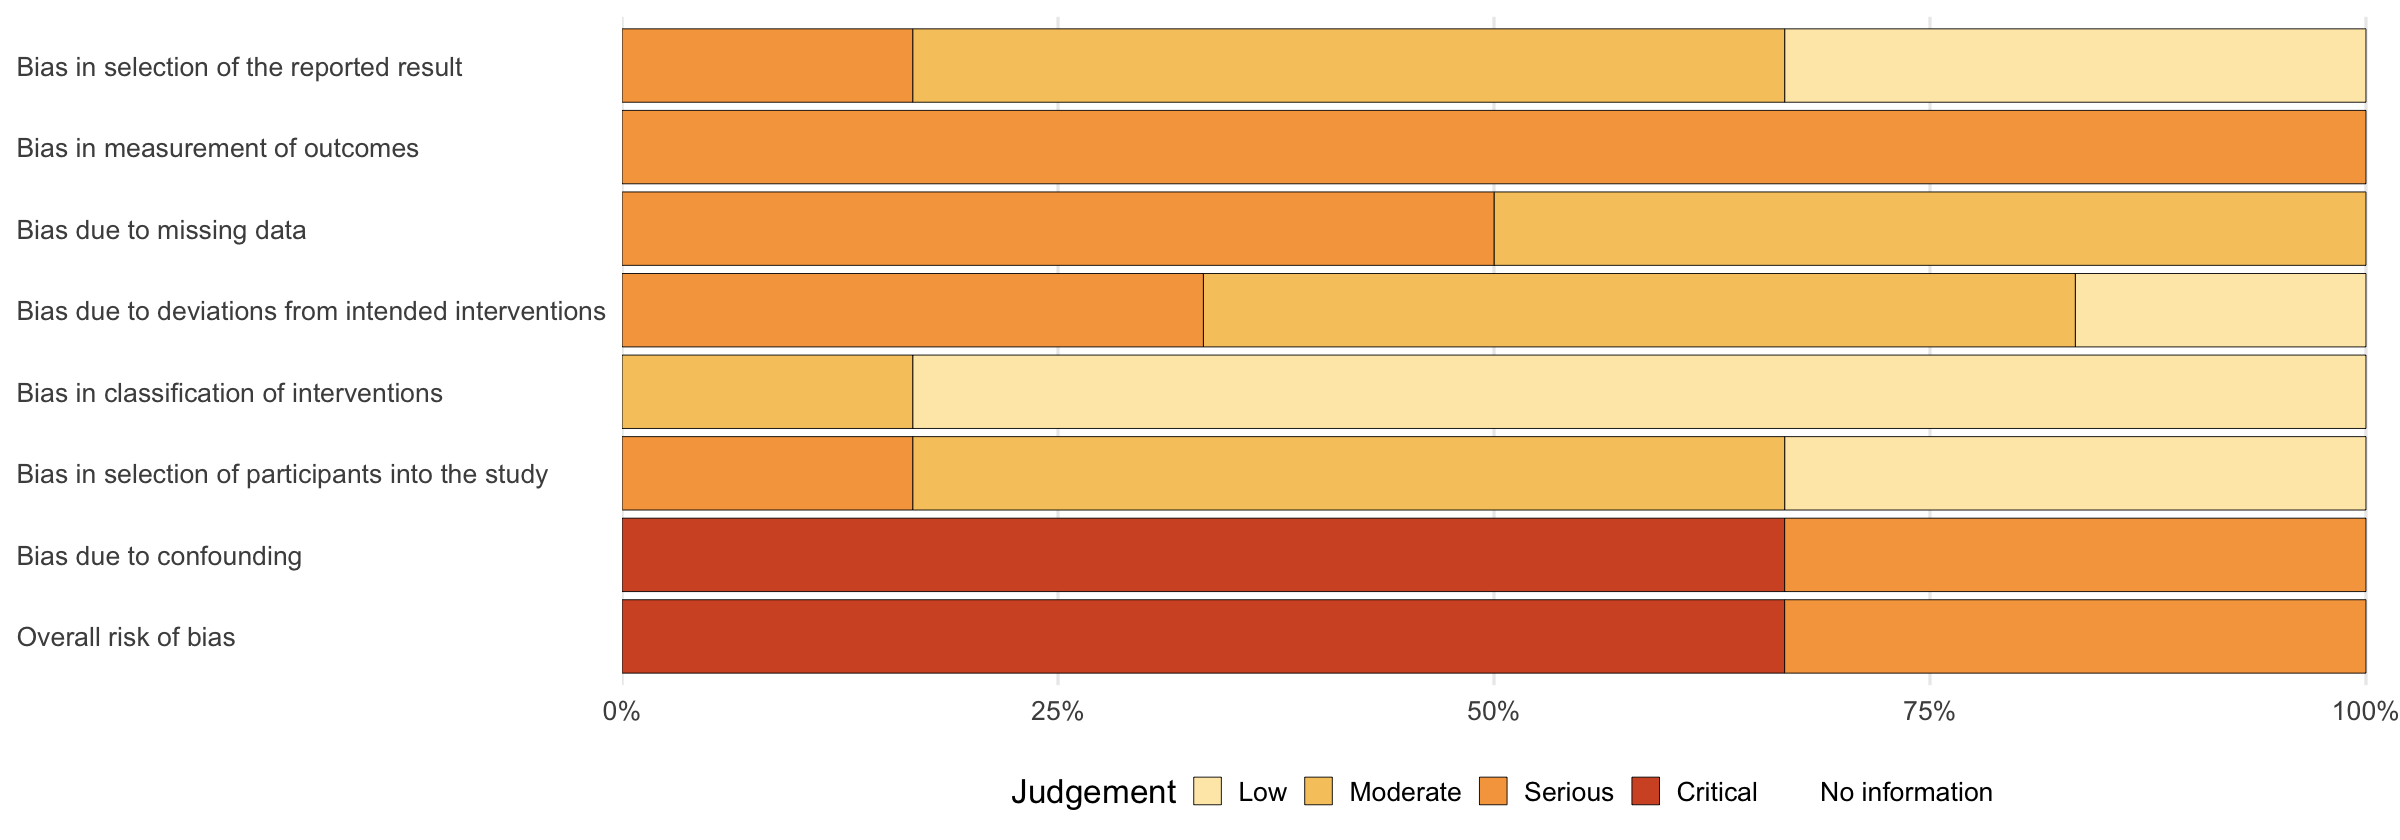

In [36]:
# Plot
p_robins_summary <- ggplot(
  robins_summary_full,
  aes(x = pct, y = domain, fill = judgement)
) +
  geom_col(color = "black", linewidth = 0.25) +
  scale_fill_manual(values = cols_robins, drop = FALSE) +
  scale_x_continuous(
    labels = function(x) paste0(x, "%"),
    expand = expansion(mult = c(0, 0.01))
  ) +
  labs(x = NULL, y = NULL, fill = "Judgement") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    legend.direction = "horizontal",
    legend.box = "horizontal",
    axis.text.y = element_text(hjust = 0)
  )

p_robins_summary

Risk-of-bias assessment using the ROBINS-I tool indicated predominantly moderate to serious risks of bias across domains. The overall risk of bias was rated as serious or critical in most studies, mainly driven by bias due to confounding, which was consistently identified as the principal limitation of observational designs in this review. Residual confounding was common where exposure to cold-water interventions could not be disentangled from co-interventions such as physical activity, psychological resilience, or habitual cold exposure. Bias in selection of participants into the study and bias in classification of interventions were typically rated as low to moderate, suggesting generally appropriate sampling and intervention documentation. Similarly, bias due to deviations from intended interventions and bias due to missing data were mostly moderate or serious, reflecting incomplete reporting of adherence and loss-to-follow-up procedures. Bias in measurement of outcomes and bias in selection of the reported result were dominated by moderate ratings, indicating some ambiguity in blinding or selective reporting but few cases of critical concern.

In summary, the ROBINS-I evaluations point to moderate overall study quality, with confounding and incomplete outcome data representing the most frequent threats to internal validity among non-randomized designs.

In [37]:
# Save plot as PDF
file_out <- file.path(output_path, "RiskOfBiasSummary_ROBINS_I.pdf")

ggsave(
  filename = file_out,
  plot = p_robins_summary,
  device = "pdf",
  width = 20,
  height = 7,
  dpi = 400
)

# ROBINS-E

In [38]:
# Reading sheet
robinse_raw <- readxl::read_excel(file, sheet = 3)

In [39]:
## quick check
glimpse(robinse_raw)

Rows: 2
Columns: 3
$ studyid <dbl> 33, 32
$ authors <chr> "Hirvonen et al. 2002", "Huttunen et al. 2004"
$ Overall <chr> "Very high risk", "Very high risk"


In [40]:
# Harmonise text a bit
recode_robinse <- function(x) {
  case_when(
    x %in% c("Low", "low") ~ "Low",
    x %in% c("Moderate", "moderate") ~ "Moderate",
    x %in% c("Serious", "serious") ~ "Serious",
    x %in% c("Critical", "critical") ~ "Critical",
    x %in% c("Very high", "very high", "Very high risk", "very high risk") ~ "Very high risk",
    TRUE ~ "No information"
  )
}

In [41]:
# Study-level rows 
robinse_studies <- robinse_raw %>%
  mutate(
    domain = authors,                    # each study becomes its own row
    judgement = recode_robinse(Overall),
    pct = 100                            # always 100% for a single study row
  ) %>%
  select(domain, judgement, pct)

In [42]:
# Overall row
# "overall" here = distribution across all ROBINS-E studies
robinse_overall <- robinse_raw %>%
  mutate(judgement = recode_robinse(Overall)) %>%
  count(judgement, name = "n_studies") %>%
  mutate(
    domain = "Overall risk of bias (ROBINS-E)",
    pct = n_studies / sum(n_studies) * 100
  ) %>%
  select(domain, judgement, pct)


In [43]:
# Bind
robinse_plotdat <- bind_rows(robinse_overall, robinse_studies)

In [44]:
# Ordering
robinse_order <- c(
  "Low",
  "Moderate",
  "Serious",
  "Critical",
  "Very high risk",
  "No information"
)

robinse_plotdat <- robinse_plotdat %>%
  mutate(
    domain = factor(
      domain,
      levels = c(
        "Overall risk of bias (ROBINS-E)",
        robinse_raw$authors              # keep original order of studies
      )
    ),
    judgement = factor(judgement, levels = robinse_order)
  )

In [45]:
# Colours – keep in same family as ROBINS-I, but add a stronger one for "Very high risk"
cols_robinse <- c(
  "Low" = "#FEE8B6",
  "Moderate" = "#F6C86C",
  "Serious" = "#F6A54C",
  "Critical" = "#D3562C",
  "Very high risk" = "#9E2F20",
  "No information" = "#D9D9D9"
)

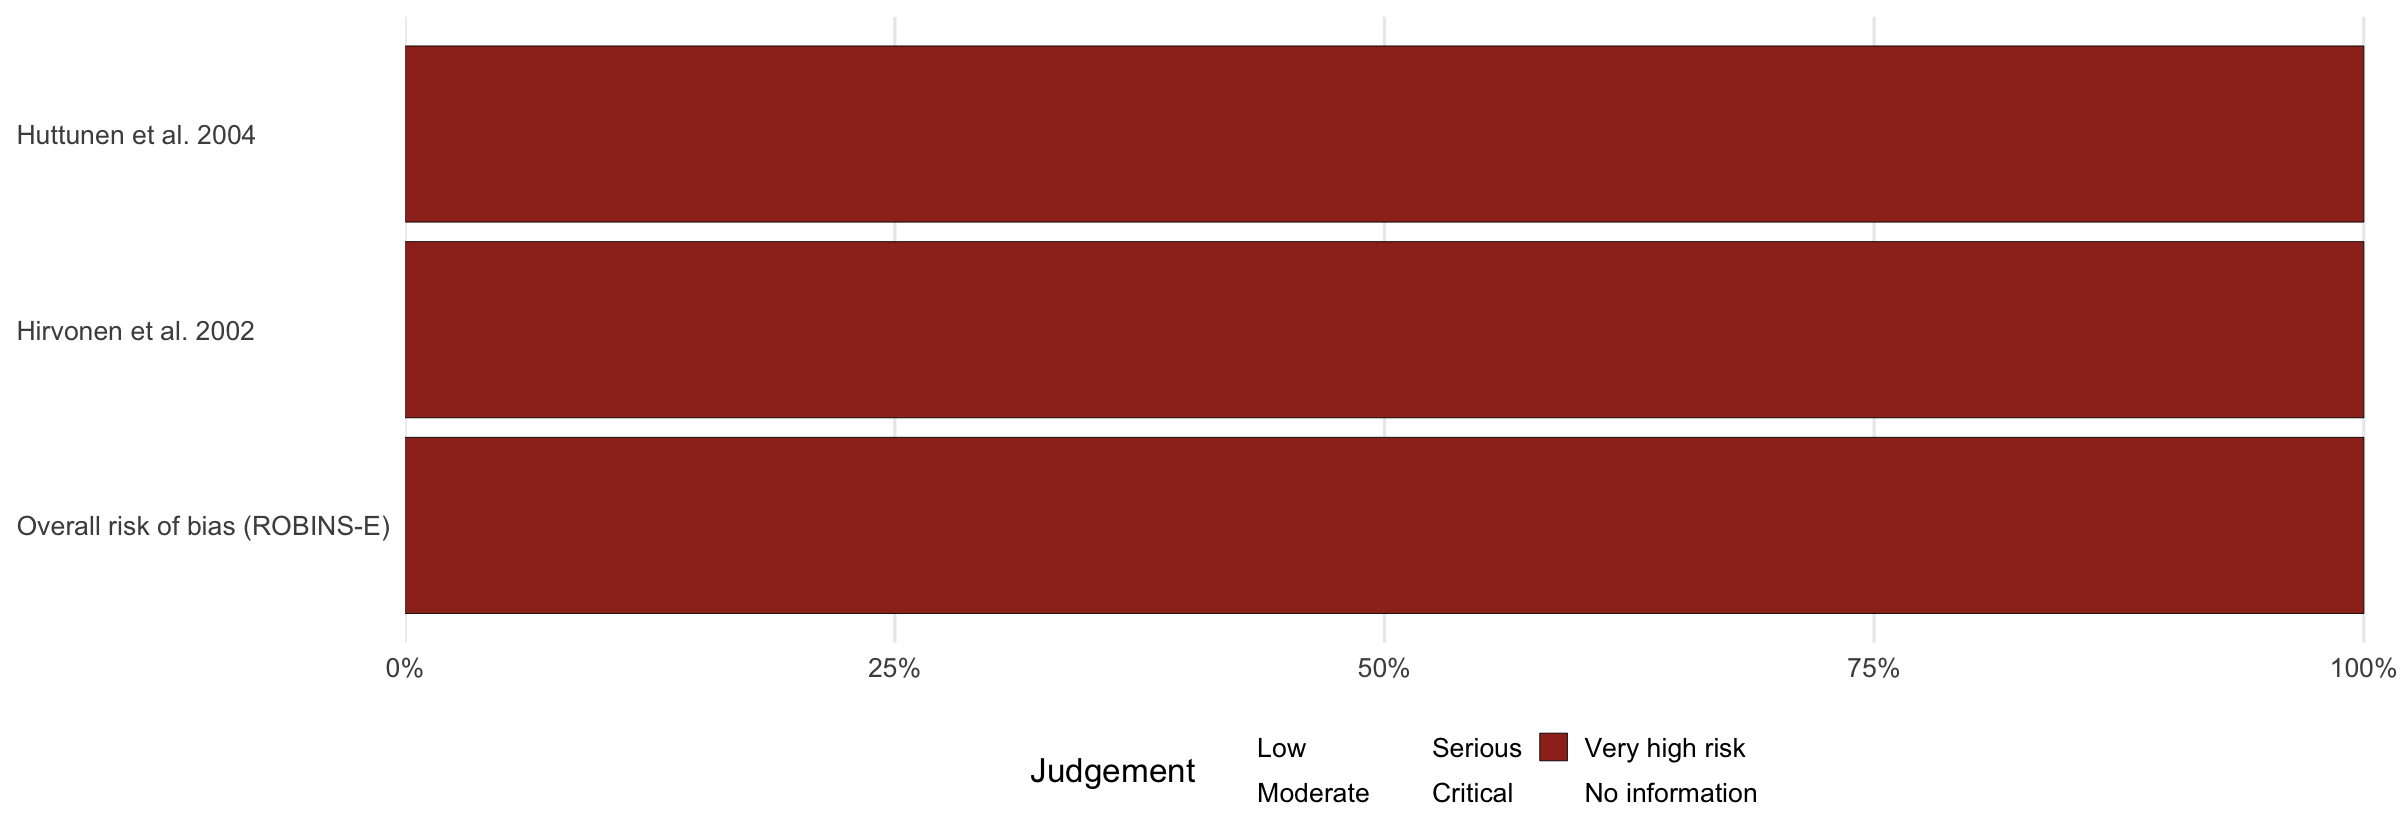

In [46]:
# Plot
p_robinse <- ggplot(
  robinse_plotdat,
  aes(x = pct, y = domain, fill = judgement)
) +
  geom_col(color = "black", linewidth = 0.25) +
  scale_fill_manual(values = cols_robinse, drop = FALSE) +
  scale_x_continuous(
    labels = function(x) paste0(x, "%"),
    expand = expansion(mult = c(0, 0.01)),
    limits = c(0, 100)
  ) +
  labs(x = NULL, y = NULL, fill = "Judgement") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    legend.direction = "horizontal",
    legend.box = "horizontal",
    axis.text.y = element_text(hjust = 0)
  )

p_robinse

Two exploratory studies were assessed using the ROBINS-E tool. Both were rated as having a very high overall risk of bias, reflecting major methodological and reporting limitations inherent to their observational, exploratory design. Key issues included the absence of control groups, lack of pre-specified analysis plans, and limited adjustment for potential confounding factors. Given the very small number of studies, these findings should be interpreted descriptively, and no formal aggregation or visualization beyond this summary was undertaken.

Nonetheless, the consistently very high ratings highlight the need for more rigorous study designs and transparent reporting in future exploratory work on cold-water exposure.

In [47]:
# Save plot as PDF
file_out <- file.path(output_path, "RiskOfBiasSummary_ROBINS_E.pdf")

ggsave(
  filename = file_out,
  plot = p_robinse,
  device = "pdf",
  width = 20,
  height = 7,
  dpi = 400
)